In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

In [ ]:
shape_param=6
scale_param=3

In [3]:
sample_data = weibull_min.rvs(shape_param, scale=scale_param, size=1000)

## Shape parameter estimation using newton raphson method(beta)

In [ ]:
from scipy.optimize import newton
from scipy.stats import weibull_min
shape_param=6
scale_param=3
nvec = np.round(np.logspace(1, 4, 10))
mc = 100
ans = np.zeros(shape=(len(nvec), mc))

for i in range(len(nvec)):
    N1 = int(nvec[i])
    for m in range(mc):
        x = weibull_min.rvs(shape_param, scale=scale_param, size=int(nvec[i]))  # Assuming initial parameter
        print(np.sum(x<0))
        n = int(nvec[i])

        def f(shape_param):
            s=0
            cc=n/shape_param
            return s+cc-n*np.log(scale_param)+np.sum(np.log(x+0.001))-np.sum(((x/scale_param)**shape_param)*(np.log(x+0.001)-np.log(scale_param)))

        def derv(shape_param):
            s=0
            cc=-n/(shape_param**2)
            return s+cc-np.sum((shape_param*(x/scale_param)**(shape_param-1))*(np.log(x+0.000001)-np.log(scale_param)))

        initial_guess = 1.0
        try:
            ans[i, m] = newton(f, initial_guess, fprime=derv, maxiter=1000)
            print(ans[i,m])
        except RuntimeError:
            #print(f"Newton's method did not converge for n={nvec[i]} and mc={m}.")
            ans[i, m] = np.nan

print(ans)

Text(0.5, 1.0, 'Estimates vs N')

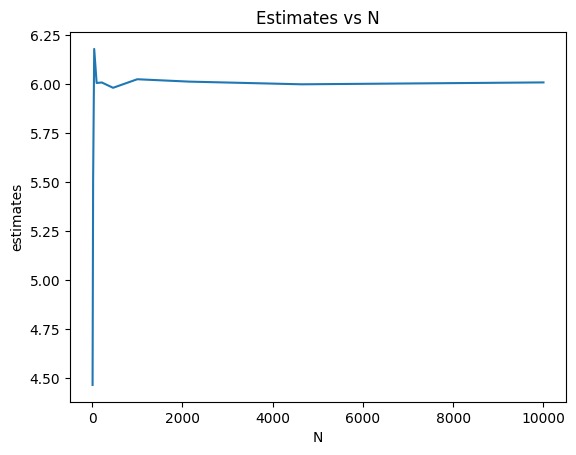

In [5]:
import matplotlib.pyplot as plt
plt.plot(nvec,np.nanmean(ans,axis=1))
plt.xlabel('N')
plt.ylabel('estimates')
plt.title('Estimates vs N')

In [ ]:
from scipy.optimize import newton
nvec=np.round(np.logspace(1,2,10))
mc=10
ans=np.zeros(shape=(len(nvec),mc))
guesss=2
for i in range(len(nvec)):
  N1=nvec[i]
  for m in range(mc):
    x=weibull_min.rvs(shape_param, scale=scale_param, size=int(nvec[i]))
    cc=nvec[i]/shape_param
    n=int(nvec[i])
    def f(shape_param):
      s=0
      cc=n/shape_param
      return s+cc-n*np.log(scale_param)+np.sum(np.log(x))-np.sum(((x/scale_param)**shape_param)*(np.log(x)-np.log(scale_param)))
    def derv(shape_param):
      s=0
      cc=-n/(shape_param**2)
      return s+cc-np.sum((shape_param*(x/scale_param)**(shape_param-1))*(np.log(x)-np.log(scale_param)))
    def newton_raphson(initial_guess, tolerance=1e-6, max_iterations=100000000):
      guesse = initial_guess
      for _ in range(max_iterations):
          f_prime = f(guesse)
          f_double_prime = derv(guesse)
          if abs(f_prime) < tolerance:
              return guesse
          guesse = guesse - f_prime / f_double_prime
      return guesse
    ans[i,m]=newton_raphson(guesss)
    print(guesss)


Text(0.5, 1.0, 'Estimates vs N')

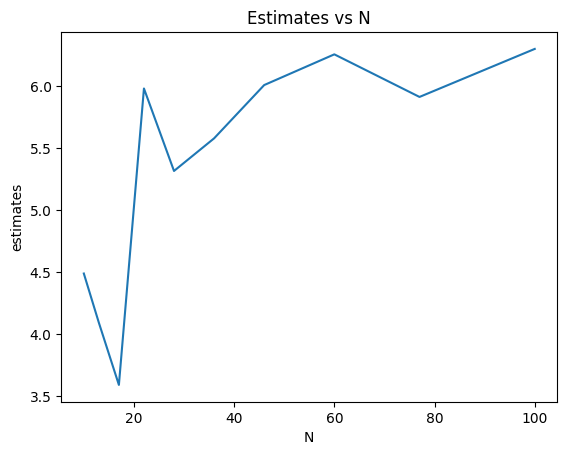

In [ ]:
import matplotlib.pyplot as plt
plt.plot(nvec,np.nanmean(ans,axis=1))
plt.xlabel('N')
plt.ylabel('estimates')
plt.title('Estimates vs N')

## Scale Parameter using newton raphson (alpha)

In [ ]:
from scipy.optimize import newton
from scipy.stats import weibull_min
shape_param=6
scale_param=3
nvec = np.round(np.logspace(1, 4, 10))
mc = 100
ans = np.zeros(shape=(len(nvec), mc))

for i in range(len(nvec)):
    N1 = int(nvec[i])
    for m in range(mc):
        x = weibull_min.rvs(shape_param, scale=scale_param, size=int(nvec[i]))  # Assuming initial parameter
        print(np.sum(x<0))
        n = int(nvec[i])

        def f(scale_param):
            s=0
            cc=-n*shape_param/scale_param
            return s+cc+(shape_param/(scale_param**(shape_param+1)))*np.sum(x**shape_param)

        def derv(scale_param):
            s=0
            cc=n*shape_param/(scale_param**2)
            return s+cc-(shape_param+1)*shape_param*(scale_param**(-shape_param-2))*np.sum(x**shape_param)
        initial_guess = 2
        def newton_raphson(initial_guess, tolerance=1e-6, max_iterations=100000):
            guesse = initial_guess
            for _ in range(max_iterations):
                f_prime = f(guesse)
                f_double_prime = derv(guesse)
                if abs(f_prime) < tolerance:
                    return guesse
                guesse = guesse - f_prime / f_double_prime
            return guesse
        try:
            ans[i, m] = newton_raphson(1,)
            print(ans[i,m])
        except RuntimeError:
            #print(f"Newton's method did not converge for n={nvec[i]} and mc={m}.")
            ans[i, m] = np.nan

print(ans)

In [ ]:
from scipy.optimize import newton
from scipy.stats import weibull_min
shape_param=6
scale_param=3
nvec = np.round(np.logspace(1, 4, 10))
mc = 1000
ans = np.zeros(shape=(len(nvec), mc))

for i in range(len(nvec)):
    N1 = int(nvec[i])
    for m in range(mc):
        x = weibull_min.rvs(shape_param, scale=scale_param, size=int(nvec[i]))  # Assuming initial parameter
        print(np.sum(x<0))
        n = int(nvec[i])

        def f(scale_param):
            s=0
            cc=-n*shape_param/scale_param
            return s+cc+(shape_param/(scale_param**(shape_param+1)))*np.sum(x**shape_param)

        def derv(scale_param):
            s=0
            cc=n*shape_param/(scale_param**2)
            return s+cc-(shape_param+1)*shape_param*(scale_param**(-shape_param-2))*np.sum(x**shape_param)
        initial_guess = 1
        try:
            ans[i, m] = newton(f,initial_guess,fprime=derv,maxiter=100000)
            print(ans[i,m])
        except RuntimeError:
            #print(f"Newton's method did not converge for n={nvec[i]} and mc={m}.")
            ans[i, m] = np.nan

print(ans)

Text(0.5, 1.0, 'Estimates vs N')

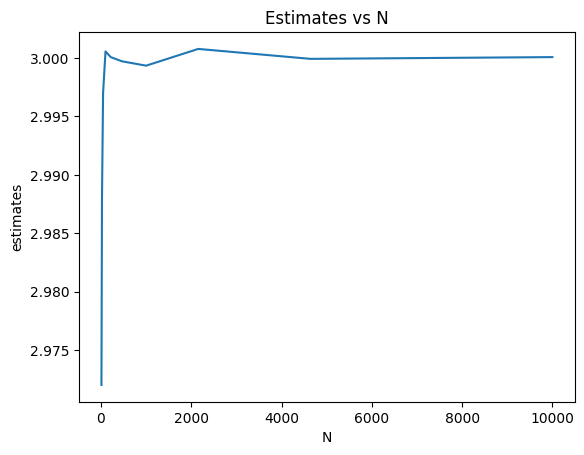

In [15]:
import matplotlib.pyplot as plt
plt.plot(nvec,np.nanmean(ans,axis=1))
plt.xlabel('N')
plt.ylabel('estimates')
plt.title('Estimates vs N')

### Estimation using the moments method

In [25]:
from sklearn.utils import resample
from scipy.special import gamma
shape_param=6
scale_param=3
nvec = np.round(np.logspace(1, 4, 10))
mc = 100
ans = np.zeros(shape=(len(nvec), mc))
estimates_mom_a=np.zeros(shape=(len(nvec),mc))
estimates_mom_b=np.zeros(shape=(len(nvec),mc))
estimates_mle_a=np.zeros(shape=(len(nvec),mc))
estimates_mle_b=np.zeros(shape=(len(nvec),mc))
for i in range(len(nvec)):
    N1 = int(nvec[i])
    for m in range(mc):
        x = weibull_min.rvs(shape_param, scale=scale_param, size=int(nvec[i]))
        n = int(nvec[i])
        ema=[]
        emb=[]
        mlea=[]
        mleb=[]
        for _ in range(5):
            sample = resample(x)
            mu = np.mean(sample)
            var = np.var(sample)
            a = (var / mu**2) ** -0.5
            b = mu / gamma(1 + 1/a)
            ema.append(a)
            emb.append(b)
            params = weibull_min.fit(sample, floc=0)
            mlea.append(params[0])
            mleb.append(params[1])
        estimates_mom_a[i,m]=np.mean(ema)
        estimates_mom_b[i,m]=np.mean(emb)
        estimates_mle_a[i,m]=np.mean(mlea)
        estimates_mle_b[i,m]=np.mean(mleb)

In [27]:
np.mean(estimates_mle_a)

6.365027662038045